# 나만의 모델 만들기

패키지 불러오기

In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("house_price (2).csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


데이터 구조  
- 데이터: 1978년 보스턴 주택 가격  
- 관측치 개수: 506개
- 변수 개수: 설명변수 13개 / 반응변수 1개

독립 변수(원인: 예측값을 설명할 수 있는 변수)      
- CRIM: 범죄율  
- INDUS: 비소매상업지역 면적 비율  
- NOX: 일산화질소 농도  
- RM: 주택당 방 수  
- LSTAT: 인구 중 하위 계층 비율  
- B: 인구 중 흑인 비율  
- PTRATIO: 학생/교사 비율  
- ZN: 25,000 평방피트를 초과 거주지역 비율  
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
- AGE: 1940년 이전에 건축된 주택의 비율  
- RAD: 방사형 고속도로까지의 거리  
- DIS: 직업센터의 거리  
- TAX: 재산세율  

종속 변수(결과: 예측하고자 하는 값)
- MEDV: 주택가격

## 데이터 전처리&EDA
데이터를 로드하고 기본적인 정보를 확인

In [18]:
df.info() #전체적인 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


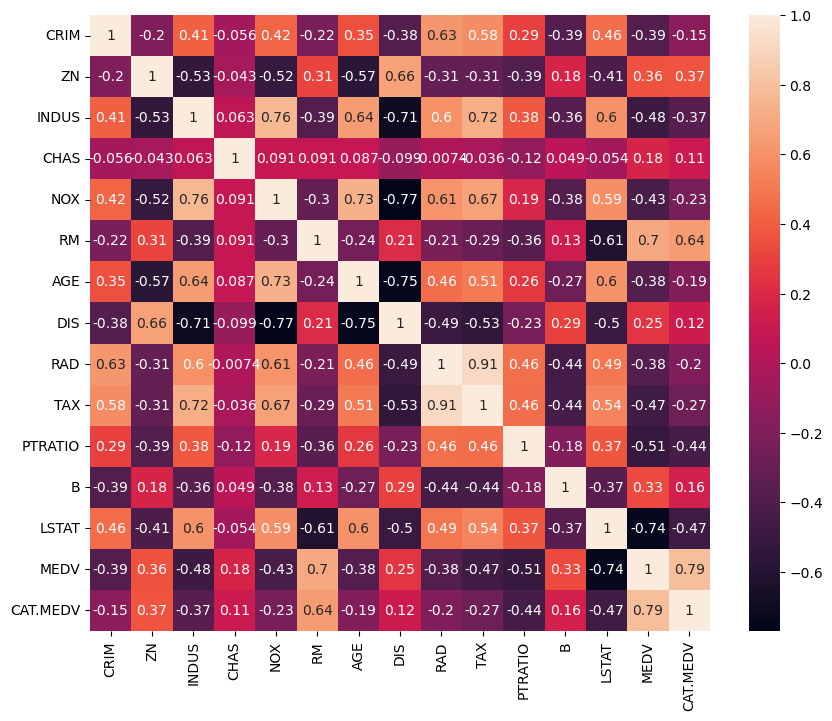

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show() #전체적인 변수간 상관관계 확인

사용하지 않을 컬럼 제거('CAT.MEDV' 컬럼은 범주형 변수로, 본 분석에서는 필요하지 않으므로 제거)

In [22]:
df.drop(labels="CAT.MEDV",axis=1,inplace=True)

## 변수 지정 및 다중공선성 확인

In [27]:
X = df.drop(labels='MEDV',axis=1)
y = df["MEDV"]

1) 상관계수 통해 확인

In [31]:
X.corr() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


2) VIF 통해 확인

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def vif(X):
    vif_data = pd.DataFrame()
    vif_data["Features"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data)
vif(X) 

   Features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


### 다중공선성이 높은 변수 제거
높은 순서대로 삭제 (기준: 15)

In [40]:
vif(X.drop('PTRATIO',axis=1))

   Features        VIF
0      CRIM   2.099345
1        ZN   2.451624
2     INDUS  14.275283
3      CHAS   1.142167
4       NOX  73.894171
5        RM  60.598846
6       AGE  21.361234
7       DIS  12.221605
8       RAD  15.159162
9       TAX  59.301541
10        B  18.614751
11    LSTAT  10.138324


In [42]:
vif(X.drop(['PTRATIO','NOX'],axis=1))

   Features        VIF
0      CRIM   2.097537
1        ZN   2.449661
2     INDUS  13.150904
3      CHAS   1.138277
4        RM  41.406746
5       AGE  19.889623
6       DIS  12.032952
7       RAD  15.155012
8       TAX  57.720347
9         B  18.396072
10    LSTAT   9.207840


In [44]:
vif(X.drop(['PTRATIO','NOX','TAX'],axis=1))

  Features        VIF
0     CRIM   2.097466
1       ZN   2.375219
2    INDUS   9.290080
3     CHAS   1.118613
4       RM  39.069063
5      AGE  19.780944
6      DIS  11.817803
7      RAD   4.965633
8        B  18.289917
9    LSTAT   9.046248


In [46]:
vif(X.drop(['PTRATIO','NOX','TAX','RM'],axis=1))

  Features        VIF
0     CRIM   2.095367
1       ZN   2.334763
2    INDUS   9.016142
3     CHAS   1.116229
4      AGE  14.000758
5      DIS   8.447694
6      RAD   4.771767
7        B  13.537020
8    LSTAT   8.358925


##  statsmodels의 OLS 모듈로 선형회귀 모델 구축하기

In [49]:
X.drop(['PTRATIO','NOX','TAX','RM'],axis=1, inplace=True) #VIF 통해 확인한 다중공선성 높은 변수 제거

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [53]:
X_train = sm.add_constant(X_train) #상수항 추가
model = sm.OLS(y_train, X_train)
model_trained = model.fit()

In [55]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     86.32
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.51e-87
Time:                        18:03:08   Log-Likelihood:                -1261.3
No. Observations:                 404   AIC:                             2543.
Df Residuals:                     394   BIC:                             2583.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0284      2.352     16.592      0.0

p값이 0.05가 넘는 컬럼들을 제거

In [58]:
model=sm.OLS(y_train,X_train.drop(['RAD','AGE'], axis=1 ))
model_trained=model.fit()
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     110.0
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           8.29e-89
Time:                        18:03:48   Log-Likelihood:                -1263.2
No. Observations:                 404   AIC:                             2542.
Df Residuals:                     396   BIC:                             2574.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1062      1.924     21.367      0.000      37.324      44.888
CRIM          -0.0842      0.035     -2.384      0.018      -0.154      -0.015
ZN             0.1015      0.016      6.300      0.000       0.070       0.133
INDUS         -0.2802      0.063     -4.447      0.000      -0.404      -0.156
CHAS           4.5469      1.162      3.912      0.000       2.262       6.832
DIS           -1.9841      0.218     -9.086      0.000      -2.413      -1.555
B              0.0060      0.003      1.781      0.076      -0.001       0.013
LSTAT         -0.8811      0.053    -16.529      0.000      -0.986      -0.776
==============================================================================
Omnibus:                       92.383   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.697
Skew:                           1.218   Prob(JB):                     2.88e-41
Kurtosis:                       5.271   Cond. No.                     2.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

B 컬럼도 제거해보자

In [63]:
model=sm.OLS(y_train,X_train.drop(['RAD','AGE','B'], axis=1 ))
model_trained=model.fit()
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     127.1
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           3.38e-89
Time:                        18:04:12   Log-Likelihood:                -1264.8
No. Observations:                 404   AIC:                             2544.
Df Residuals:                     397   BIC:                             2572.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.5294      1.364     31.922      0.000      40.849      46.210
CRIM          -0.0977      0.035     -2.822      0.005      -0.166      -0.030
ZN             0.1004      0.016      6.219      0.000       0.069       0.132
INDUS         -0.2924      0.063     -4.654      0.000      -0.416      -0.169
CHAS           4.5994      1.165      3.948      0.000       2.309       6.890
DIS           -1.9718      0.219     -9.010      0.000      -2.402      -1.542
LSTAT         -0.8930      0.053    -16.838      0.000      -0.997      -0.789
==============================================================================
Omnibus:                       89.522   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.509
Skew:                           1.191   Prob(JB):                     2.85e-39
Kurtosis:                       5.207   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 모델 성능 평가

test 데이터 생성

In [69]:
X_test = sm.add_constant(X_test)
y_test_pred = model_trained.predict(X_test.drop(['RAD', 'AGE', 'B'], axis=1))
y_test_pred

210    21.949147
24     17.845786
36     24.928098
439    13.306045
161    32.230723
         ...    
8       3.743818
317    18.427402
390    18.480123
482    24.693029
50     18.532883
Length: 102, dtype: float64

In [71]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 31.970
Testing MAE: 4.116
Testing R2: 0.499


실습때보다 R2 값이 미약하게나마 올랐다,,,